In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt

plt.style.use('seaborn')
sns.set(style="white")

In [13]:
df = pd.read_csv('day.csv')

In [14]:
#df.head()

In [15]:
def columnize(df, column, new_vals, new_col):
    list1 = df[column].unique()
    dict1 = dict(zip(list1,new_vals))
    df[new_col] = df[column].map(dict1)
    df = pd.concat([df, pd.get_dummies(df[new_col])], 1)
    return df

In [16]:
#df = columnize(df, 'weathersit', ['clear', 'misty', 'light_storm', 'heavy_storm'],'weather')

In [17]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'] = df['dteday'].map(dt.datetime.toordinal)

In [18]:
df = df[df.cnt>100]


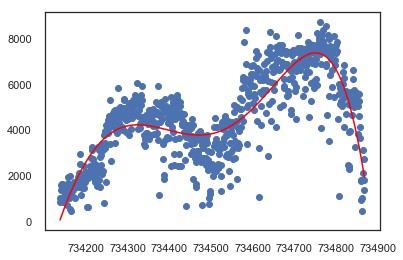

(-17.114003764909285, 52.23977569074059)

In [75]:
x=df.instant.values.reshape(-1,1)
y=df.cnt.values.reshape(-1,1)

# Regression
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

predictions = model.predict(x_poly)

# Plotting
plt.scatter(df['dteday'], df['cnt'])
plt.plot(df['dteday'],predictions,c='red')
plt.show()

model.intercept_[0], model.coef_[0][1]


In [76]:
def resid(x,y_actual):
    return (model.intercept_[0]+sum([model.coef_[0][i]*x**i for i in range(len(model.coef_[0]))])) -  y_actual

In [79]:
df['resids'] = resid(df['instant'], df['cnt'])
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,resids
0,1,734138,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,-950.051064
1,2,734139,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,-714.341934
2,3,734140,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,-1210.986806
3,4,734141,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,-1372.985849
4,5,734142,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,-1360.339215
5,6,734143,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,-1316.047031
6,7,734144,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,-1170.109405
7,8,734145,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,-569.526426
8,9,734146,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,-383.298158
9,10,734147,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,-833.424650


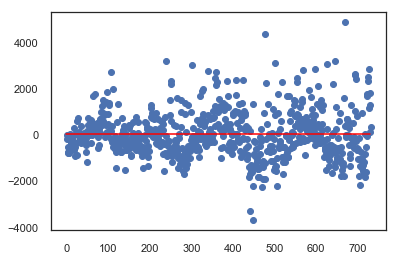

In [57]:
plt.scatter(df['instant'], df['resids'])
x = np.linspace(0,730,730)
y = np.array([0 for i in range(len(x))])
plt.plot(x,y, c='red')

In [60]:
lr_model = ols(formula='resids~temp+hum+windspeed+casual', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resids   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     88.98
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           6.02e-73
Time:                        10:36:41   Log-Likelihood:                -5906.5
No. Observations:                 730   AIC:                         1.182e+04
Df Residuals:                     724   BIC:                         1.185e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -317.6095    206.715     -1.536      0.125    -723.441      88.222
temp        1804.5886    218.441      8.261      0.000    1375.736    2233.441
hum         1098.1368    224.228      4.897      0.000     657.923    1538.351
windspeed   1576.8329    408.374      3.861      0.000     775.094    2378.572
casual        -0.1752      0.059     -2.954      0.003      -0.292      -0.059
cnt           -0.3141      0.023    -13.395      0.000      -0.360      -0.268
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.541
Skew:                           0.706   Prob(JB):                     7.23e-19
Kurtosis:                       3.869   Cond. No.                     7.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""